# Group Project
## NAMES

In [1]:
%pip install polars

import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#reading in restaurant specific data
restaurant_accepts = pl.read_csv('chefmozaccepts.csv')
restaurant_cuisine = pl.read_csv('chefmozcuisine.csv')
restaurant_hours = pl.read_csv('chefmozhours4.csv')
restaurant_parking = pl.read_csv('chefmozparking.csv')
restaurant_geo = pl.read_csv('geoplaces2.csv')

#reading in user specific data
user_cuisine = pl.read_csv('usercuisine.csv')
user_payment = pl.read_csv('userpayment.csv')
user_profile = pl.read_csv('userprofile.csv')

#reading in rating data
ratings = pl.read_csv('rating_final.csv')

In [3]:
#joining all restaurant data frames by 'placeID'
restaurant_df = (
    restaurant_geo
    .join(restaurant_accepts, on="placeID", how="left")
    .join(restaurant_cuisine, on="placeID", how="left")
    .join(restaurant_hours, on="placeID", how="left")
    .join(restaurant_parking, on="placeID", how="left")
)
print(restaurant_df)

#joining all user data frames by 'userID'
user_df = (
    user_profile
    .join(user_cuisine, on="userID", how="left")
    .join(user_payment, on="userID", how="left")
)
print(user_df)

shape: (901, 26)
┌─────────┬───────────┬────────────┬────────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ placeID ┆ latitude  ┆ longitude  ┆ the_geom_m ┆ … ┆ Rcuisine ┆ hours     ┆ days      ┆ parking_l │
│ ---     ┆ ---       ┆ ---        ┆ eter       ┆   ┆ ---      ┆ ---       ┆ ---       ┆ ot        │
│ i64     ┆ f64       ┆ f64        ┆ ---        ┆   ┆ str      ┆ str       ┆ str       ┆ ---       │
│         ┆           ┆            ┆ str        ┆   ┆          ┆           ┆           ┆ str       │
╞═════════╪═══════════╪════════════╪════════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ 134999  ┆ 18.915421 ┆ -99.184871 ┆ 0101000020 ┆ … ┆ Japanese ┆ 11:00-21: ┆ Mon;Tue;W ┆ none      │
│         ┆           ┆            ┆ 957F000088 ┆   ┆          ┆ 00;       ┆ ed;Thu;Fr ┆           │
│         ┆           ┆            ┆ 568DE35671 ┆   ┆          ┆           ┆ i;        ┆           │
│         ┆           ┆            ┆ …          ┆   ┆          ┆          

In [4]:
print(restaurant_df)
print(restaurant_df.columns)

shape: (901, 26)
┌─────────┬───────────┬────────────┬────────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ placeID ┆ latitude  ┆ longitude  ┆ the_geom_m ┆ … ┆ Rcuisine ┆ hours     ┆ days      ┆ parking_l │
│ ---     ┆ ---       ┆ ---        ┆ eter       ┆   ┆ ---      ┆ ---       ┆ ---       ┆ ot        │
│ i64     ┆ f64       ┆ f64        ┆ ---        ┆   ┆ str      ┆ str       ┆ str       ┆ ---       │
│         ┆           ┆            ┆ str        ┆   ┆          ┆           ┆           ┆ str       │
╞═════════╪═══════════╪════════════╪════════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ 134999  ┆ 18.915421 ┆ -99.184871 ┆ 0101000020 ┆ … ┆ Japanese ┆ 11:00-21: ┆ Mon;Tue;W ┆ none      │
│         ┆           ┆            ┆ 957F000088 ┆   ┆          ┆ 00;       ┆ ed;Thu;Fr ┆           │
│         ┆           ┆            ┆ 568DE35671 ┆   ┆          ┆           ┆ i;        ┆           │
│         ┆           ┆            ┆ …          ┆   ┆          ┆          

In [5]:
print(user_df)
print(user_df.columns)

shape: (416, 21)
┌────────┬───────────┬─────────────┬────────┬───┬────────┬────────┬────────────────┬───────────────┐
│ userID ┆ latitude  ┆ longitude   ┆ smoker ┆ … ┆ budget ┆ height ┆ Rcuisine       ┆ Upayment      │
│ ---    ┆ ---       ┆ ---         ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---            ┆ ---           │
│ str    ┆ f64       ┆ f64         ┆ str    ┆   ┆ str    ┆ f64    ┆ str            ┆ str           │
╞════════╪═══════════╪═════════════╪════════╪═══╪════════╪════════╪════════════════╪═══════════════╡
│ U1001  ┆ 22.139997 ┆ -100.978803 ┆ false  ┆ … ┆ medium ┆ 1.77   ┆ American       ┆ cash          │
│ U1002  ┆ 22.150087 ┆ -100.983325 ┆ false  ┆ … ┆ low    ┆ 1.87   ┆ Mexican        ┆ cash          │
│ U1003  ┆ 22.119847 ┆ -100.946527 ┆ false  ┆ … ┆ low    ┆ 1.69   ┆ Mexican        ┆ cash          │
│ U1004  ┆ 18.867    ┆ -99.183     ┆ false  ┆ … ┆ medium ┆ 1.53   ┆ Bakery         ┆ cash          │
│ U1004  ┆ 18.867    ┆ -99.183     ┆ false  ┆ … ┆ medium ┆ 1.53   ┆ Bakery

## Exploratory Data Analysis

In [6]:
# Set Polars to view all columns
pl.Config.set_tbl_rows(10) 
pl.Config.set_tbl_cols(30)

# Specify subgroups (categorical columns) for grouping
user_subgroups = ['marital_status', "Rcuisine"] 
restaurant_subgroups = ['state', "Rcuisine"] 

# Calculate overall summary statistics for the user and restaurant dfs
user_summary_stats = user_df.describe()
restaurant_summary_stats = restaurant_df.describe()

# Calculate summary statistics by subgroup for both dfs
user_summary_by_subgroup = user_df.group_by(user_subgroups).agg([
    pl.col(col).mean().alias(f"{col}_mean") for col in user_df.columns if col not in user_subgroups
] + [
    pl.col(col).min().alias(f"{col}_min") for col in user_df.columns if col not in user_subgroups
] + [
    pl.col(col).max().alias(f"{col}_max") for col in user_df.columns if col not in user_subgroups
] + [
    pl.col(col).std().alias(f"{col}_std") for col in user_df.columns if col not in user_subgroups
])

restaurant_summary_by_subgroup = restaurant_df.group_by(restaurant_subgroups).agg([
    pl.col(col).mean().alias(f"{col}_mean") for col in restaurant_df.columns if col not in restaurant_subgroups
] + [
    pl.col(col).min().alias(f"{col}_min") for col in restaurant_df.columns if col not in restaurant_subgroups
] + [
    pl.col(col).max().alias(f"{col}_max") for col in restaurant_df.columns if col not in restaurant_subgroups
] + [
    pl.col(col).std().alias(f"{col}_std") for col in restaurant_df.columns if col not in restaurant_subgroups
])

# Display results
print(f"User Dataset Dimensions: {user_df.shape}")
print("\nUser Summary Statistics:\n", user_summary_stats)

print(f"\nUser Summary Statistics by Subgroup RC:\n", user_summary_by_subgroup)

print(f"Restaurant Dataset Dimensions: {restaurant_df.shape}")
print("\nRestaurant Summary Statistics:\n", restaurant_summary_stats)

print(f"\nRestaurant Summary Statistics by Subgroup:\n", restaurant_summary_by_subgroup)

User Dataset Dimensions: (416, 21)

User Summary Statistics:
 shape: (9, 22)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ sta ┆ use ┆ lat ┆ lon ┆ smo ┆ dri ┆ dre ┆ amb ┆ tra ┆ mar ┆ hij ┆ bir ┆ int ┆ per ┆ rel ┆ act ┆ col ┆ wei ┆ bud ┆ hei ┆ Rcu ┆ Upa │
│ tis ┆ rID ┆ itu ┆ git ┆ ker ┆ nk_ ┆ ss_ ┆ ien ┆ nsp ┆ ita ┆ os  ┆ th_ ┆ ere ┆ son ┆ igi ┆ ivi ┆ or  ┆ ght ┆ get ┆ ght ┆ isi ┆ yme │
│ tic ┆ --- ┆ de  ┆ ude ┆ --- ┆ lev ┆ pre ┆ ce  ┆ ort ┆ l_s ┆ --- ┆ yea ┆ st  ┆ ali ┆ on  ┆ ty  ┆ --- ┆ --- ┆ --- ┆ --- ┆ ne  ┆ nt  │
│ --- ┆ str ┆ --- ┆ --- ┆ str ┆ el  ┆ fer ┆ --- ┆ --- ┆ tat ┆ str ┆ r   ┆ --- ┆ ty  ┆ --- ┆ --- ┆ str ┆ f64 ┆ str ┆ f64 ┆ --- ┆ --- │
│ str ┆     ┆ f64 ┆ f64 ┆     ┆ --- ┆ enc ┆ str ┆ str ┆ us  ┆     ┆ --- ┆ str ┆ --- ┆ str ┆ str ┆     ┆     ┆     ┆     ┆ str ┆ str │
│     ┆     ┆     ┆     ┆     ┆ str ┆ e   ┆     ┆     ┆ --- ┆     ┆ f64 ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆    

Columns chosen for distribution analysis based on min and max (potential outliers) for numerical columns
User: Weight, Birth Year
*Restaurant data all relevant columns are categorical

Look at Distribution for chosen numerical columns and box plots for outliers

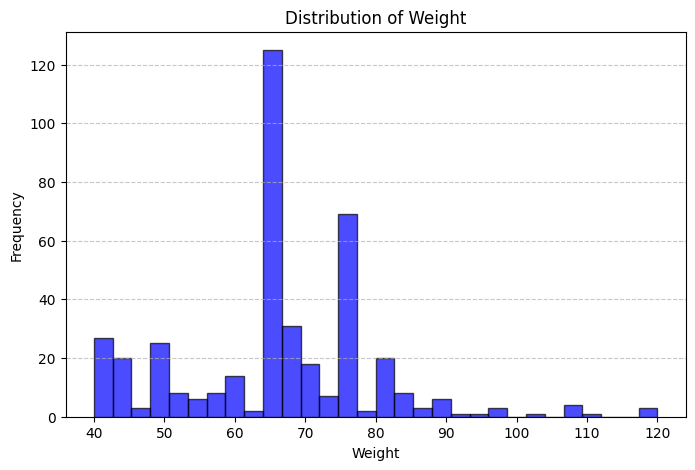

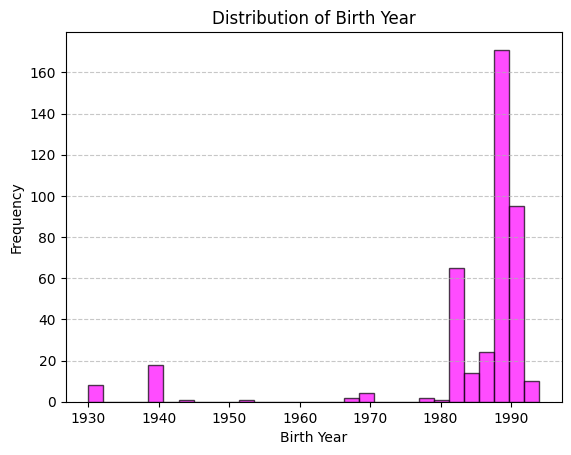

In [7]:
# Set figure size for better readability
plt.figure(figsize=(8, 5))

# Histogram of Weight
plt.hist(user_df["weight"], bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()

# Histogram of Birth Year
plt.hist(user_df["birth_year"], bins=30, color="magenta", edgecolor="black", alpha=0.7)
plt.title("Distribution of Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()

The weight data is fairly normal and log transformation is unnecessary. The birth year data is pretty heavily skewed to the left, but because it is birth year, this just shows a variety of ages and makes the data still relevant. Therefore log transformation is not necessary. However, we will look at box plots of these two variables to determine and handle the outliers. 

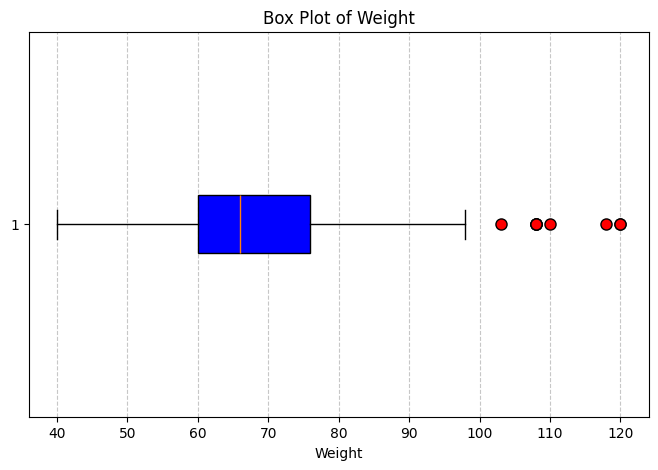

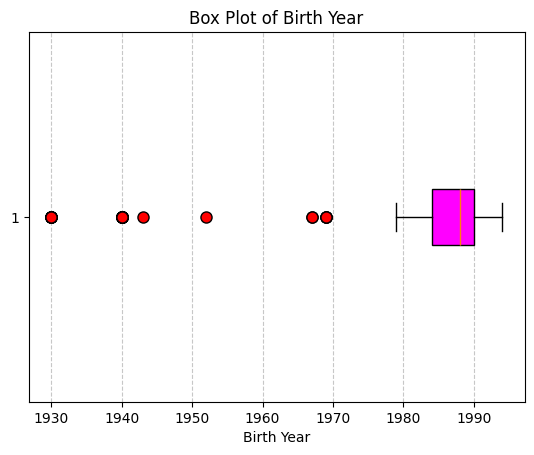

In [8]:
# Set figure size for better readability
plt.figure(figsize=(8, 5))

# Box Plot of Weight
plt.boxplot(user_df["weight"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='blue', color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none'))
plt.title("Box Plot of Weight")
plt.xlabel("Weight")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Box Plot of Birth Year
plt.boxplot(user_df["birth_year"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='magenta', color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none'))
plt.title("Box Plot of Birth Year")
plt.xlabel("Birth Year")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [9]:
def handle_outliers(df, column, threshold=1.5):
    """
    Params: given a dataframe and column, 
    Return: the dataframe without outliers for that column
    """

    # Calculate quartiles and IQR
    q1 = df.select(pl.col(column).quantile(0.25)).item()
    q3 = df.select(pl.col(column).quantile(0.75)).item()
    iqr = q3 - q1
    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")

    # Calculate bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    # Calculate median for replacement
    replacement_value = df.select(pl.col(column).median()).item()
    print(f"Replacement Value (Median): {replacement_value}")
    
    # Update outliers with median value
    df = df.with_columns(
        pl.when(
            (pl.col(column) < lower_bound) | (pl.col(column) > upper_bound)
        ).then(replacement_value).otherwise(pl.col(column)).alias(column)
    )
    
    return df 

In [10]:
# Clean Weight and Birth Year
cleaned_user_df = handle_outliers(user_df, "weight")
cleaned_user_df = handle_outliers(cleaned_user_df, "birth_year")

Q1: 60.0, Q3: 76.0, IQR: 16.0
Lower Bound: 36.0, Upper Bound: 100.0
Replacement Value (Median): 66.0
Q1: 1984.0, Q3: 1990.0, IQR: 6.0
Lower Bound: 1975.0, Upper Bound: 1999.0
Replacement Value (Median): 1988.0


Look at Null and Missing Values

In [12]:
type(cleaned_user_df)

polars.dataframe.frame.DataFrame

In [18]:
cleaned_user_df = cleaned_user_df.with_columns([
    pl.when(pl.col(col).cast(pl.Utf8).str.to_lowercase().is_in(["?", "none"]))
    .then(None)
    .otherwise(pl.col(col))
    .alias(col)
    for col in cleaned_user_df.columns
])

restaurant_df = restaurant_df.with_columns([
    pl.when(pl.col(col).cast(pl.Utf8).str.to_lowercase().is_in(["?", "none"]))
    .then(None)
    .otherwise(pl.col(col))
    .alias(col)
    for col in restaurant_df.columns
])

# Iterate through columns and count null values in each column
user_null_counts = cleaned_user_df.select([
    pl.col(column).is_null().sum().alias(column) for column in cleaned_user_df.columns
])

# Show the result
print(user_null_counts)

# Iterate through columns and count null values in each column
rest_null_counts = restaurant_df.select([
    pl.col(column).is_null().sum().alias(column) for column in restaurant_df.columns
])

# Show the result
print(rest_null_counts)

shape: (1, 21)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ use ┆ lat ┆ lon ┆ smo ┆ dri ┆ dre ┆ amb ┆ tra ┆ mar ┆ hij ┆ bir ┆ int ┆ per ┆ rel ┆ act ┆ col ┆ wei ┆ bud ┆ hei ┆ Rcu ┆ Upa │
│ rID ┆ itu ┆ git ┆ ker ┆ nk_ ┆ ss_ ┆ ien ┆ nsp ┆ ita ┆ os  ┆ th_ ┆ ere ┆ son ┆ igi ┆ ivi ┆ or  ┆ ght ┆ get ┆ ght ┆ isi ┆ yme │
│ --- ┆ de  ┆ ude ┆ --- ┆ lev ┆ pre ┆ ce  ┆ ort ┆ l_s ┆ --- ┆ yea ┆ st  ┆ ali ┆ on  ┆ ty  ┆ --- ┆ --- ┆ --- ┆ --- ┆ ne  ┆ nt  │
│ u32 ┆ --- ┆ --- ┆ u32 ┆ el  ┆ fer ┆ --- ┆ --- ┆ tat ┆ u32 ┆ r   ┆ --- ┆ ty  ┆ --- ┆ --- ┆ u32 ┆ u32 ┆ u32 ┆ u32 ┆ --- ┆ --- │
│     ┆ u32 ┆ u32 ┆     ┆ --- ┆ enc ┆ u32 ┆ u32 ┆ us  ┆     ┆ --- ┆ u32 ┆ --- ┆ u32 ┆ u32 ┆     ┆     ┆     ┆     ┆ u32 ┆ u32 │
│     ┆     ┆     ┆     ┆ u32 ┆ e   ┆     ┆     ┆ --- ┆     ┆ u32 ┆     ┆ u32 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆ --- ┆     ┆     ┆ u32 ┆     ┆     ┆     ┆     ┆     ┆    

We can see that null values are not a widespread issue and can be isolated to RPayment, RCuisine, hours and days. Since they are not widespread, no further data analysis needs to be done, it is just noted when using these columns, especially RCuisine, that there is significant missing data. 

In [23]:
cleaned_user_df = cleaned_user_df.to_pandas()
# cleaned_user_df = polars_df.to_pandas()

# Drop rows with more than 3 nulls
max_allowed_nulls = 3
min_required_non_nulls = cleaned_user_df.shape[1] - max_allowed_nulls

cleaned_user_df = cleaned_user_df.dropna(thresh=min_required_non_nulls)

In [24]:
cleaned_user_df

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,interest,personality,religion,activity,color,weight,budget,height,Rcuisine,Upayment
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,variety,thrifty-protector,None,student,black,69.0,medium,1.77,American,cash
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,...,technology,hunter-ostentatious,Catholic,student,red,40.0,low,1.87,Mexican,cash
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,...,None,hard-worker,Catholic,student,blue,60.0,low,1.69,Mexican,cash
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,variety,hard-worker,None,professional,green,44.0,medium,1.53,Bakery,cash
4,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,variety,hard-worker,None,professional,green,44.0,medium,1.53,Bakery,bank_debit_cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,...,variety,hunter-ostentatious,Catholic,student,purple,66.0,low,1.54,Southern,cash
412,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,...,variety,hunter-ostentatious,Catholic,student,purple,66.0,low,1.54,Dessert-Ice_Cream,cash
413,U1136,22.149607,-100.997235,true,social drinker,no preference,friends,car owner,single,independent,...,retro,thrifty-protector,Catholic,student,black,50.0,low,1.60,Mexican,cash
414,U1137,22.144803,-100.944623,false,social drinker,formal,family,public,single,independent,...,eco-friendly,hard-worker,Catholic,student,blue,72.0,low,1.78,Mexican,cash


In [25]:
cleaned_user_df = pl.from_pandas(cleaned_user_df)


Look At Correlation Matrix for Numerical Columns (only User data is relevant)

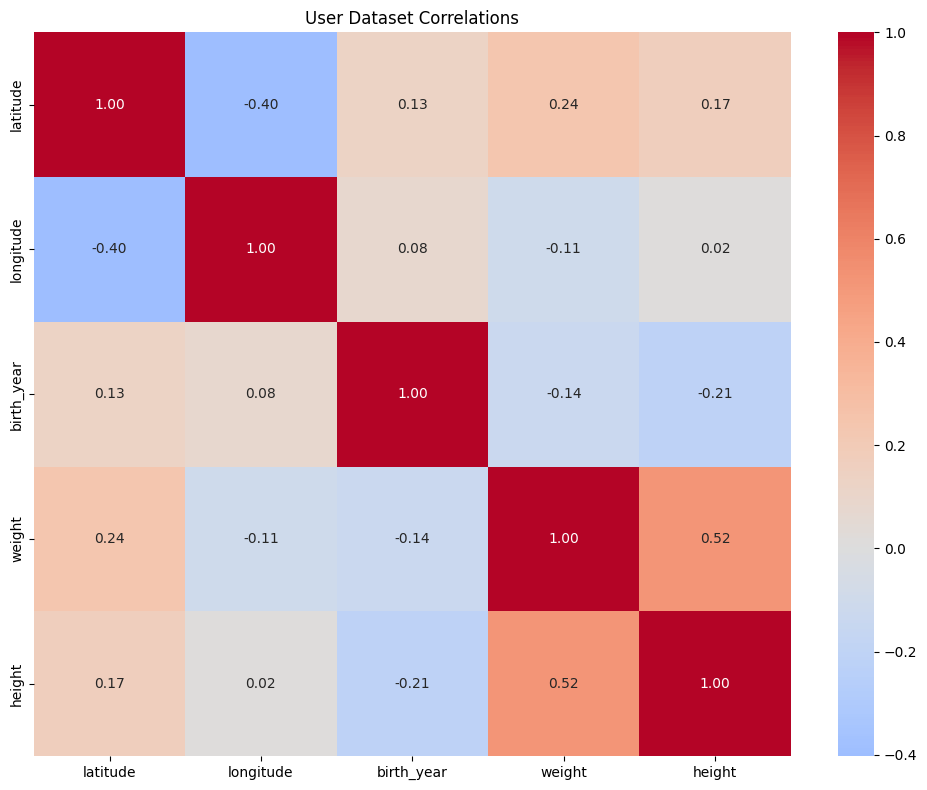

In [27]:
# Select only numeric columns for correlation analysis - user only because restaurant is mainly categorical
numeric_cols_user = [col for col in cleaned_user_df.columns if cleaned_user_df[col].dtype in [pl.Float64, pl.Int64]]

# Calculate correlation coefficients only for user numeric columns
user_corr = cleaned_user_df.select(numeric_cols_user).corr()

# Function to visualize correlation matrix
def plot_correlation_matrix(corr_matrix, title="Correlation Matrix"):
    """Params: given correlation matrix 
    Return: heatmap plot of matrix 
    """
    plt.figure(figsize=(10, 8))
    
    # Convert to pandas and ensure column names are used as indices
    corr_df = corr_matrix.to_pandas()
    
    # Make sure we use the same column names for both axes
    sns.heatmap(corr_df, 
                annot=True, 
                fmt=".2f", 
                cmap="coolwarm", 
                center=0,
                xticklabels=corr_df.columns,
                yticklabels=corr_df.columns)
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot correlation matrices
plot_correlation_matrix(user_corr, title="User Dataset Correlations")

ANALYSIS HERE